## <strong style="color:RoyalBlue">Introduction</strong>

* The dataset has 35116 observations for previous international transactions.
* The observations span 37 different countries.
* There is no target variable.

### Features

Invoice information
* 'InvoiceNo' – Unique ID for invoice
* 'InvoiceDate' – Invoice date

Item information
* 'StockCode' – Unique ID for item
* 'Description' – Text description for item
* 'Quantity' – Units per pack for item
* 'UnitPrice' – Price per unit in GBP

Customer information
* 'CustomerID' – Unique ID for customer
* 'Country' – Country of customer

## <strong style="color:RoyalBlue">Library Imports</strong>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# For model comparison
from sklearn.metrics import adjusted_rand_score

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [3]:
sns.set_style('darkgrid')
pd.options.display.max_columns=100
pd.options.mode.chained_assignment = None

In [4]:
tx_df = pd.read_csv('int_online_tx.csv')
tx_df.shape

(35116, 8)

## <strong style="color:RoyalBlue">Exploratory Analysis</strong>

In [5]:
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France


In [6]:
tx_df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
tx_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,35116.000000,35116.000000,35116.000000,33698.000000
mean,559940.650273,14.624302,4.700512,12793.819188
std,12645.318619,31.144229,51.807988,828.171434
min,536370.000000,1.000000,0.040000,12347.000000
25%,548737.000000,5.000000,1.250000,12473.000000
50%,561037.000000,10.000000,1.950000,12597.000000
75%,570672.000000,12.000000,3.750000,12708.000000
max,581587.000000,2040.000000,4161.060000,17844.000000


In [8]:
# Let's see the summary statistics for categorical features
tx_df.select_dtypes(include='object').describe()

,StockCode,Description,InvoiceDate,Country
count,35116,35116,35116,35116
unique,2602,2669,1577,37
top,POST,POSTAGE,10/11/11 14:52,Germany
freq,1057,1057,259,9040


In [9]:
tx_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

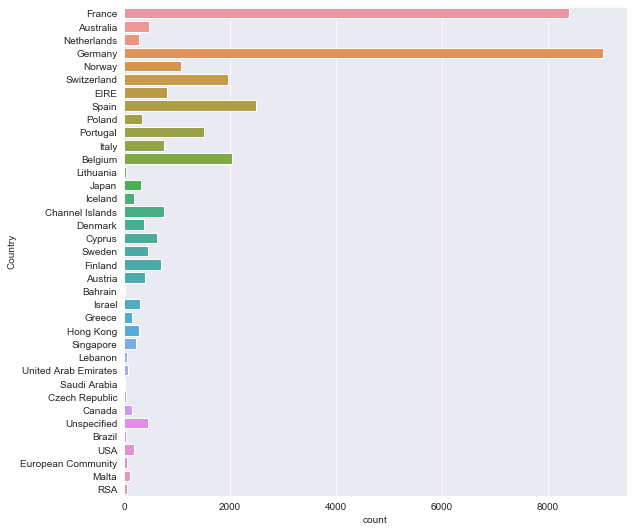

In [10]:
plt.figure(figsize=(9,9))
sns.countplot(y=tx_df.Country)
plt.show()

## <strong style="color:RoyalBlue">Data Cleaning</strong>

In [11]:
# Let's neglect records with missing CustomerID
clean_tx_df = tx_df[ tx_df.CustomerID.notnull() ]

In [12]:
# Let's convert CustomerID to integer
clean_tx_df['CustomerID'] = clean_tx_df.CustomerID.astype(int)

## <strong style="color:RoyalBlue">Feature Engineering</strong>

In [13]:
clean_tx_df['Sales'] = clean_tx_df.UnitPrice * clean_tx_df.Quantity

clean_tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


### Invoice Data

In [14]:
invoice_data = clean_tx_df.groupby('CustomerID').InvoiceNo.nunique().to_frame(name='total_transactions')
# invoice_data = clean_tx_df.groupby('CustomerID').InvoiceNo.agg(['nunique'])
# invoice_data.columns = ['total_transactions']

invoice_data.head()

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


### Item Data

In [15]:
item_dummies = pd.get_dummies(clean_tx_df.StockCode)
item_dummies['CustomerID'] = clean_tx_df.CustomerID
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


In [16]:
item_data = item_dummies.groupby('CustomerID').sum()
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [17]:
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

### Top 20

In [18]:
top_20_items = item_data.sum().sort_values().tail(20).index
top_20_items

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')

In [19]:
top_20_item_data = item_data[top_20_items]
top_20_item_data.shape

(414, 20)

In [20]:
top_20_item_data.head()

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


### Cart Data

In [21]:
cart_data = clean_tx_df.groupby(['CustomerID','InvoiceNo']).Sales.agg(['sum'])
cart_data.columns = ['cart_value']

cart_data.head()

cart_value
CustomerID InvoiceNo            
12347      537626         711.79
           542237         475.39
           549222         636.25
           556201         382.52
           562032         584.91

In [22]:
cart_data.reset_index(inplace=True)

cart_data.head()

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


Let's aggregate cart data by customer. Engineer 3 features:
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.
* Let's name it <code style="color:crimson">agg_cart_data</code>.

In [23]:
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg(['mean','min','max'])
agg_cart_data.columns = ['avg_cart_value','min_cart_value','max_cart_value']

agg_cart_data.head()

,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


### Product Data

In [24]:
product_data = clean_tx_df.groupby('CustomerID').StockCode.agg(['count','nunique'])
product_data.head()

,count,nunique
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [25]:
product_data.columns = ['total_products', 'total_unique_products']
product_data.head()

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [26]:
any(product_data.total_unique_products > product_data.total_products)

False

### Sales Data

In [27]:
sales_data = clean_tx_df.groupby('CustomerID').Sales.agg(['sum','mean'])
sales_data.columns = ['total_sales','avg_product_value']

sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


### Customer Data

Let's join all customer data together.

In [28]:
customer_data = invoice_data.join([product_data,sales_data,agg_cart_data])
customer_data.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30


### Item Data PCA

In [29]:
item_data_scaled = StandardScaler().fit_transform(item_data)
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [30]:
item_data_scaled.shape

(414, 2574)

In [31]:
item_data_pca = PCA().fit(item_data_scaled)
item_data_pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# item_data_pca.explained_variance_ratio_
item_data_pca.n_features_

2574

In [33]:
PC_items = item_data_pca.transform(item_data_scaled)
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  1.41206491e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -6.08887940e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  4.13905021e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  3.61169428e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04, -6.89049512e-14]])

### Explained Variance

In [34]:
item_data_pca.explained_variance_ratio_.sum()

1.0

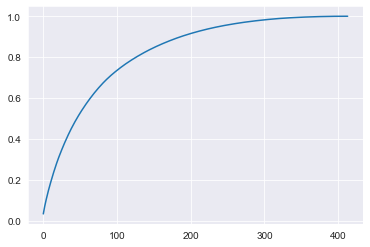

In [35]:
PC_items_cumsum = item_data_pca.explained_variance_ratio_.cumsum()

plt.plot(range(len(PC_items_cumsum)),PC_items_cumsum)
plt.show()

In [36]:
# cumulative explained variance of the first 125 components
item_data_pca.explained_variance_ratio_[:125].sum()

0.7955069032205403

### Dimensionality Reduction

In [37]:
item_data_scaled.shape

(414, 2574)

In [38]:
item_data_pca_final = PCA(n_components=125).fit(item_data_scaled)
PC_items_final = item_data_pca_final.transform(item_data_scaled)

PC_items_final

array([[ 5.87614119,  4.82891597, -0.49554547, ..., -0.09491036,
        -0.88559603, -0.34811474],
       [-4.21984064,  1.22622724, -1.88191   , ...,  0.78439032,
        -0.53772625,  0.76207427],
       [-1.26083722,  2.38774861, -0.07310619, ...,  1.13315156,
        -0.14986932, -1.81764661],
       ...,
       [-5.21816163,  3.64839155,  2.50646162, ...,  0.1253374 ,
        -0.77670781, -0.23523796],
       [-4.93612992,  3.0218614 , -1.50717174, ..., -2.99121194,
        -2.9765286 , -4.27147812],
       [-6.04237289, -0.29136191, -0.67400637, ..., -0.47724034,
        -0.07174198, -0.22449906]])

In [39]:
PC_items_final.shape

(414, 125)

### Final Items

In [40]:
df_items = pd.DataFrame(PC_items_final)

df_items.columns = ['PC{}'.format(i+1) for i in np.arange(125)]

df_items.index = item_data.index

In [41]:
df_items.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828916,-0.495545,3.093869,-0.633646,-11.534099,2.161937,7.116939,5.336015,4.424430,4.636875,2.316395,12.310947,1.986616,-11.431383,5.617897,-2.177646,7.666505,-12.136249,-16.048706,-5.949805,7.814703,40.518647,-35.574789,-17.555508,6.868828,20.887426,2.297259,-26.160848,-32.579092,7.875526,12.362238,6.823109,-32.957210,-4.403740,-17.236791,-11.271346,-14.487564,-2.769155,4.732540,-6.987125,-1.462680,10.602596,1.237445,3.088755,5.330893,-0.406383,1.604631,-6.386978,3.057480,...,-2.264021,2.604406,-0.886406,-1.718605,-1.956718,1.190783,0.435346,-1.258566,-2.192904,-3.543818,0.569767,-1.936076,0.653981,0.452448,0.604280,-2.228362,-0.065585,0.278554,-0.558674,-0.669785,-0.618741,-0.524914,-0.027683,0.196425,-0.680398,-0.876327,-1.039390,-0.520428,-0.601642,0.195994,0.850053,-0.445780,0.623014,1.258662,-0.270471,0.424664,-0.936973,-0.728540,0.222357,-0.523131,-0.337823,0.415240,-0.361735,-0.599309,-0.052321,0.001041,-0.249145,-0.094910,-0.885596,-0.348115
12348,-4.219841,1.226227,-1.881910,-0.174392,0.818032,1.160784,-0.871607,-0.846465,0.460094,0.854287,-0.400905,0.982205,-1.103403,0.769675,-0.093035,-0.312820,-0.448247,1.206906,0.383475,-0.469112,0.184926,0.054130,0.500850,0.372219,1.225968,-0.769282,-0.270118,0.850689,-0.373809,-0.572932,1.016388,-0.577835,0.949917,-0.737441,0.354293,-0.384799,-0.298299,0.397728,0.152696,0.337996,-0.468851,0.714529,1.198261,-0.210312,-0.872237,-0.051013,-0.425396,-1.621050,-0.404067,0.440943,...,1.147568,-1.001332,-0.448748,-0.500567,-0.183346,0.091252,-0.686109,-0.473590,0.694930,0.166919,0.072591,0.017040,-2.025111,-0.060031,-0.434883,-0.568670,0.124992,0.774721,-0.973663,-0.618609,-0.343098,0.449761,0.936506,1.471735,-0.530019,1.013882,1.213414,0.171561,-2.352086,1.562579,0.504526,-0.316704,0.183565,-1.785477,-0.174082,0.806176,0.666415,-0.014870,-1.889946,1.124448,0.021939,0.739027,0.152051,0.397923,1.013521,0.726789,0.534374,0.784390,-0.537726,0.762074
12349,-1.260837,2.387749,-0.073106,-1.118928,-0.034000,-3.714959,-0.342864,-0.148943,-0.789429,-0.378863,1.570280,0.185043,0.224066,-0.050029,3.179415,-0.513357,-1.840679,0.382951,0.318478,-0.004837,-0.425557,0.458905,-0.793052,1.750794,-1.483589,0.748227,-0.910490,0.773100,0.509069,-1.343235,0.295530,0.664430,0.088625,-0.211809,-0.682179,-1.531784,0.805067,-1.426472,-0.119036,-0.928327,0.102281,-0.087533,-0.183059,0.705708,1.384907,-0.265268,-0.099983,-0.178811,0.872719,1.723077,...,-2.479714,-1.023508,1.552004,0.530775,1.451934,0.047776,-1.100149,0.896461,1.238782,-1.337003,1.764282,0.649337,-2.804926,-2.325957,-0.150921,-1.636876,-1.936341,-2.784004,-0.827530,0.732949,0.311877,-0.997911,1.383445,0.964400,1.566701,2.921918,-0.015677,0.970641,2.799963,-0.125465,2.752977,-2.513960,-1.528241,-1.144507,-2.905998,-0.189188,3.580978,-3.056921,0.816905,-2.106925,-1.479892,-4.352823,1.324616,-4.380264,2.977742,0.228721,0.906331,1.133152,-0.149869,-1.817647
12350,-4.929323,-0.714831,-1.580922,-0.469808,-0.116267,0.647796,0.112806,-1.336272,1.547316,-1.190524,-0.213409,1.057218,-0.474994,0.856385,-1.305014,0.242032,0.267982,1.953387,-0.228619,0.571016,-0.186130,0.903417,1.364669,0.178003,-0.259004,-0.168819,-0.681700,1.082836,-0.155483,-0.399065,0.238578,0.634027,-1.448465,-0.184813,-0.317233,-0.305679,-1.360100,-0.000306,0.581452,-0.241648,0.584120,-0.222861,0.289021,0.527726,-0.531859,-0.102732,-1.480319,0.134

## <strong style="color:RoyalBlue">Cluster Analysis</strong>

In [42]:
base_df = customer_data.copy()
threshold_item_data = top_20_item_data.copy()
pca_item_data = df_items.copy()

For this project, we will look at 3 possible feature sets and compare the clusters created from them. We'll try:

1. Only purchase pattern features ("Base DF")
2. Purchase pattern features + item features chosen by thresholding ("Threshold DF")
3. Purchase pattern features + principal component features from items ("PCA DF")

In [43]:
print(base_df.shape)
print(threshold_item_data.shape)
print(pca_item_data.shape)

(414, 8)
(414, 20)
(414, 125)


In [44]:
threshold_df = base_df.join(threshold_item_data)
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [45]:
pca_df = base_df.join(pca_item_data)
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828916,-0.495545,3.093869,-0.633646,-11.534099,2.161937,7.116939,5.336015,4.424430,4.636875,2.316395,12.310947,1.986616,-11.431383,5.617897,-2.177646,7.666505,-12.136249,-16.048706,-5.949805,7.814703,40.518647,-35.574789,-17.555508,6.868828,20.887426,2.297259,-26.160848,-32.579092,7.875526,12.362238,6.823109,-32.957210,-4.403740,-17.236791,-11.271346,-14.487564,-2.769155,4.732540,-6.987125,-1.462680,...,-2.264021,2.604406,-0.886406,-1.718605,-1.956718,1.190783,0.435346,-1.258566,-2.192904,-3.543818,0.569767,-1.936076,0.653981,0.452448,0.604280,-2.228362,-0.065585,0.278554,-0.558674,-0.669785,-0.618741,-0.524914,-0.027683,0.196425,-0.680398,-0.876327,-1.039390,-0.520428,-0.601642,0.195994,0.850053,-0.445780,0.623014,1.258662,-0.270471,0.424664,-0.936973,-0.728540,0.222357,-0.523131,-0.337823,0.415240,-0.361735,-0.599309,-0.052321,0.001041,-0.249145,-0.094910,-0.885596,-0.348115
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219841,1.226227,-1.881910,-0.174392,0.818032,1.160784,-0.871607,-0.846465,0.460094,0.854287,-0.400905,0.982205,-1.103403,0.769675,-0.093035,-0.312820,-0.448247,1.206906,0.383475,-0.469112,0.184926,0.054130,0.500850,0.372219,1.225968,-0.769282,-0.270118,0.850689,-0.373809,-0.572932,1.016388,-0.577835,0.949917,-0.737441,0.354293,-0.384799,-0.298299,0.397728,0.152696,0.337996,-0.468851,0.714529,...,1.147568,-1.001332,-0.448748,-0.500567,-0.183346,0.091252,-0.686109,-0.473590,0.694930,0.166919,0.072591,0.017040,-2.025111,-0.060031,-0.434883,-0.568670,0.124992,0.774721,-0.973663,-0.618609,-0.343098,0.449761,0.936506,1.471735,-0.530019,1.013882,1.213414,0.171561,-2.352086,1.562579,0.504526,-0.316704,0.183565,-1.785477,-0.174082,0.806176,0.666415,-0.014870,-1.889946,1.124448,0.021939,0.739027,0.152051,0.397923,1.013521,0.726789,0.534374,0.784390,-0.537726,0.762074
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260837,2.387749,-0.073106,-1.118928,-0.034000,-3.714959,-0.342864,-0.148943,-0.789429,-0.378863,1.570280,0.185043,0.224066,-0.050029,3.179415,-0.513357,-1.840679,0.382951,0.318478,-0.004837,-0.425557,0.458905,-0.793052,1.750794,-1.483589,0.748227,-0.910490,0.773100,0.509069,-1.343235,0.295530,0.664430,0.088625,-0.211809,-0.682179,-1.531784,0.805067,-1.426472,-0.119036,-0.928327,0.102281,-0.087533,...,-2.479714,-1.023508,1.552004,0.530775,1.451934,0.047776,-1.100149,0.896461,1.238782,-1.337003,1.764282,0.649337,-2.804926,-2.325957,-0.150921,-1.636876,-1.936341,-2.784004,-0.827530,0.732949,0.311877,-0.997911,1.383445,0.964400,1.566701,2.921918,-0.015677,0.970641,2.799963,-0.125465,2.752977,-2.513960,-1.528241,-1.144507,-2.905998,-0.189188,3.580978,-3.056921,0.816905,-2.106925,-1.479892,-4.352823,1.324616,-4.380264,2.977742,0.228721,0.906331,1.133152,-0.149869,-1.817647
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929323,-0.714831,-1.580922,-0.469808,-0.116267,0.647796,0.112806,-1.336272,1.547316,-1.190524,-0.213409,1.057218,-0.474994,0.856385,-1.305014,0.242032,0.267982,1.953387,-0.228619,0.571016,-0.186130,0.903417,1.364669,0.178003,-0.259004,-0.168819,-0.681700,1.082836,-0.155483,-0.399065,0.238578,0.634027,-1.448465,-0.184813,-0.317233,-0.305679,-1.360100,-0.000306,0.581452,-0.241648,0

### Base DF Clustering

In [46]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [47]:
kmeans.fit(base_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [48]:
base_df['cluster'] = kmeans.predict(base_df)
base_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,cluster
CustomerID,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,2
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0


In [49]:
base_df.cluster.value_counts()

0    346
2     51
1     17
Name: cluster, dtype: int64

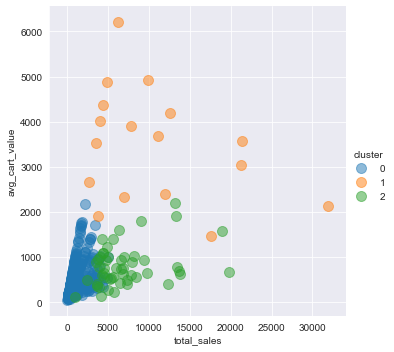

In [50]:
sns.lmplot(x='total_sales', 
           y='avg_cart_value', 
           hue='cluster', 
           data=base_df, 
           fit_reg=False, 
           scatter_kws={'alpha':0.5, 's':100})
plt.show()

### Threshold DF Clustering

In [51]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [52]:
kmeans.fit(threshold_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [53]:
threshold_df['cluster'] = kmeans.predict(threshold_df)
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0,0
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
12352,8,85,59,2506.04,29.482824,313.255000,120.33,840.30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5,1


In [54]:
threshold_df.cluster.value_counts()

1    330
0     79
2      5
Name: cluster, dtype: int64

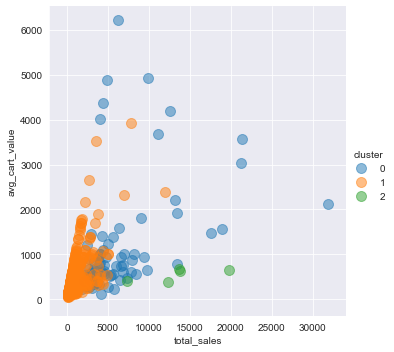

In [55]:
sns.lmplot(x='total_sales', 
           y='avg_cart_value',
           hue='cluster',
           data=threshold_df,
           fit_reg=False,
           scatter_kws={'alpha':0.5, 's':100})
plt.show()

### PCA DF Clustering

In [56]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=123))

In [57]:
kmeans.fit(pca_df)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=123,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [58]:
pca_df['cluster'] = kmeans.predict(pca_df)
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7,182,103,4310.00,23.681319,615.714286,224.82,1294.32,5.876141,4.828916,-0.495545,3.093869,-0.633646,-11.534099,2.161937,7.116939,5.336015,4.424430,4.636875,2.316395,12.310947,1.986616,-11.431383,5.617897,-2.177646,7.666505,-12.136249,-16.048706,-5.949805,7.814703,40.518647,-35.574789,-17.555508,6.868828,20.887426,2.297259,-26.160848,-32.579092,7.875526,12.362238,6.823109,-32.957210,-4.403740,-17.236791,-11.271346,-14.487564,-2.769155,4.732540,-6.987125,-1.462680,...,2.604406,-0.886406,-1.718605,-1.956718,1.190783,0.435346,-1.258566,-2.192904,-3.543818,0.569767,-1.936076,0.653981,0.452448,0.604280,-2.228362,-0.065585,0.278554,-0.558674,-0.669785,-0.618741,-0.524914,-0.027683,0.196425,-0.680398,-0.876327,-1.039390,-0.520428,-0.601642,0.195994,0.850053,-0.445780,0.623014,1.258662,-0.270471,0.424664,-0.936973,-0.728540,0.222357,-0.523131,-0.337823,0.415240,-0.361735,-0.599309,-0.052321,0.001041,-0.249145,-0.094910,-0.885596,-0.348115,2
12348,4,31,22,1797.24,57.975484,449.310000,227.44,892.80,-4.219841,1.226227,-1.881910,-0.174392,0.818032,1.160784,-0.871607,-0.846465,0.460094,0.854287,-0.400905,0.982205,-1.103403,0.769675,-0.093035,-0.312820,-0.448247,1.206906,0.383475,-0.469112,0.184926,0.054130,0.500850,0.372219,1.225968,-0.769282,-0.270118,0.850689,-0.373809,-0.572932,1.016388,-0.577835,0.949917,-0.737441,0.354293,-0.384799,-0.298299,0.397728,0.152696,0.337996,-0.468851,0.714529,...,-1.001332,-0.448748,-0.500567,-0.183346,0.091252,-0.686109,-0.473590,0.694930,0.166919,0.072591,0.017040,-2.025111,-0.060031,-0.434883,-0.568670,0.124992,0.774721,-0.973663,-0.618609,-0.343098,0.449761,0.936506,1.471735,-0.530019,1.013882,1.213414,0.171561,-2.352086,1.562579,0.504526,-0.316704,0.183565,-1.785477,-0.174082,0.806176,0.666415,-0.014870,-1.889946,1.124448,0.021939,0.739027,0.152051,0.397923,1.013521,0.726789,0.534374,0.784390,-0.537726,0.762074,2
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55,-1.260837,2.387749,-0.073106,-1.118928,-0.034000,-3.714959,-0.342864,-0.148943,-0.789429,-0.378863,1.570280,0.185043,0.224066,-0.050029,3.179415,-0.513357,-1.840679,0.382951,0.318478,-0.004837,-0.425557,0.458905,-0.793052,1.750794,-1.483589,0.748227,-0.910490,0.773100,0.509069,-1.343235,0.295530,0.664430,0.088625,-0.211809,-0.682179,-1.531784,0.805067,-1.426472,-0.119036,-0.928327,0.102281,-0.087533,...,-1.023508,1.552004,0.530775,1.451934,0.047776,-1.100149,0.896461,1.238782,-1.337003,1.764282,0.649337,-2.804926,-2.325957,-0.150921,-1.636876,-1.936341,-2.784004,-0.827530,0.732949,0.311877,-0.997911,1.383445,0.964400,1.566701,2.921918,-0.015677,0.970641,2.799963,-0.125465,2.752977,-2.513960,-1.528241,-1.144507,-2.905998,-0.189188,3.580978,-3.056921,0.816905,-2.106925,-1.479892,-4.352823,1.324616,-4.380264,2.977742,0.228721,0.906331,1.133152,-0.149869,-1.817647,2
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40,-4.929323,-0.714831,-1.580922,-0.469808,-0.116267,0.647796,0.112806,-1.336272,1.547316,-1.190524,-0.213409,1.057218,-0.474994,0.856385,-1.305014,0.242032,0.267982,1.953387,-0.228619,0.571016,-0.186130,0.903417,1.364669,0.178003,-0.259004,-0.168819,-0.681700,1.082836,-0.155483,-0.399065,0.238578,0.634027,-1.448465,-0.184813,-0.317233,-0.305679,-1.360100,-0.000306,0.581452,-0.241648,0.584120,-0.222861,..

In [59]:
pca_df.cluster.value_counts()

2    371
0     42
1      1
Name: cluster, dtype: int64

Only 1 datapoint in cluster 1 will be a problem in plotting data with lmplot. Let's show it using regular scatter plot. (Another way to solve this issue is to add any random datapoint to cluster 1)

In [60]:
# pca_df.iloc[0, 8]=2
# pca_df.head()

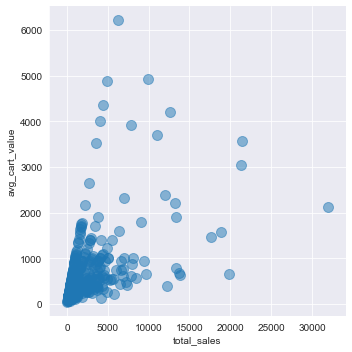

In [61]:
sns.lmplot(x='total_sales',
           y='avg_cart_value',
           # hue='cluster',
           data=pca_df,
           fit_reg=False,
           scatter_kws={'alpha':0.5, 's':100})
plt.show()

## <span style="color:RoyalBlue">Model Comparison</span>

Great, now just as a recap, here's what we have so far:
1. Clusters created by only using purchase pattern features (saved in <code style="color:steelblue">base_df</code>)
2. Clusters created by using purchase pattern features **and** thresholded item data (saved in <code style="color:steelblue">threshold_df</code>)
3. Clusters created by using purchase pattern features **and** PCA item data (saved in <code style="color:steelblue">pca_df</code>)

Most importantly, each of those 3 dataframes have the same indices. Specifically, they each still have the **CustomerID's** as their indices. That means we can directly compare and constrast the clusters created from those 3 clustering approaches.

Let's display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">threshold_df.cluster</code>.

In [62]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(base_df.cluster, threshold_df.cluster)

0.6021354951782343

Let's display the adjusted Rand index between <code style="color:steelblue">base_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.

In [63]:
# Similary between base_df.cluster and pca_df.cluster
adjusted_rand_score(pca_df.cluster, base_df.cluster)

0.6652762487548387

Finally, display the adjusted Rand index between <code style="color:steelblue">threshold_df.cluster</code> and <code style="color:steelblue">pca_df.cluster</code>.

In [64]:
# Similary between threshold_df.cluster and pca_df.cluster
adjusted_rand_score(threshold_df.cluster, pca_df.cluster)

0.5249125831594715